### Day Objective
- Classification Models
    - K Nearest Neighbours Classifier
- Evaluation Metrics

### K-NN Classifier
- Easy to implement
- KNN model will assumes that similar things exist nearer to each other

#### How does KNN works
- Step1: Select K no.of neighbours. K = 3,4,5,...
- Step2: Calculate the distance between selected data point and Nearest neighbours
    - *Euclidean distance Formula: Sqrt( (x2 - x1) ** 2 + (y2 - y1) ** 2)*
- Step3: Assign new data point to the majority of nearest neighbour classifier.

#### Advantages and Disadvantage
- KNN is mostly useful for multonomial classification.
- If data set contains large amount of data, then the prediction stage will be slow.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Tshirt_size.csv')
df

Height  Weight Shirt_Size
0      158      58          m
1      158      59          m
2      158      63          m
3      160      59          m
4      160      60          m
5      163      60          m
6      163      61          m
7      160      64          l
8      163      64          l
9      165      61          l
10     165      62          l
11     165      65          l
12     168      62          l
13     168      63          l
14     168      66          l
15     170      63          l
16     170      64          l
17     170      68          l

In [3]:
df.shape

(18, 3)

In [4]:
X = df[['Height','Weight']]
Y = df['Shirt_Size']

In [6]:
### Apply KNN model
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model = KNeighborsClassifier()
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
model = KNeighborsClassifier(n_neighbors = 3)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
Y_predict = model.predict(X)
Y_predict

array(['m', 'm', 'm', 'm', 'm', 'm', 'm', 'l', 'l', 'l', 'l', 'l', 'l',
       'l', 'l', 'l', 'l', 'l'], dtype=object)

In [11]:
model.predict([[162,63]])

array(['l'], dtype=object)

In [12]:
model.predict([[152,63]])

array(['m'], dtype=object)

### Evaluation metrics
- Confusion Matrix
- Accuracy Score

- **Confusion matrix**
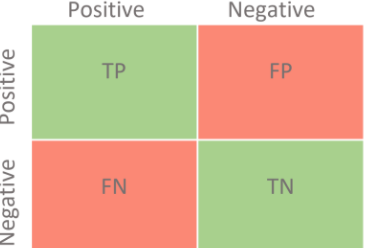

In [15]:
## Confusion matrix
#---------------------

## Cats = 50, Birds = 50, Fish = 50

###        Cats           Birds            Fish
### Cats     50            0                0
### Birds    0             48               2
### Fish     0              5               45



 
#                          TP + TN
## Accuracy Score = ---------------------------
#                       TP + TN + FP + FN

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, Y_predict)

array([[11,  0],
       [ 0,  7]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_predict)

1.0

In [17]:
df2 = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/IRIS.csv')

In [18]:
df2.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [19]:
df2.isnull().sum().sum()

0

In [21]:
df2['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [22]:
### apply KNN model to Iris dataset

In [23]:
X2 = df2.iloc[:,[0,1,2,3]]
Y2 = df2['species']

In [24]:
X2.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
knn1.fit(X2,Y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
Y_predict2 = knn1.predict(X2)

In [29]:
accuracy_score(Y2, Y_predict2)

0.96

In [30]:
### Increase K no.of neighbours 
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
knn2.fit(X2,Y2)
Y_predict3 = knn2.predict(X2)

In [33]:
accuracy_score(Y2, Y_predict3)

0.9666666666666667